In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset: Wastewater Treatment Plant Dataset 

In [240]:
file = pd.read_csv('Data-Melbourne_F_fixed.csv')

In [241]:
file

,Serial No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2,2019.0,6.0,20.0
1378,1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9,2019.0,6.0,24.0
1379,1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9,2019.0,6.0,25.0
1380,1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2,2019.0,6.0,26.0


### 1.	Data Preprocessing: 

In [242]:
file.isna().sum()

Serial No                   0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [243]:
file.columns

Index(['Serial No', 'Average Outflow', 'Average Inflow', 'Energy Consumption',
       'Ammonia', 'Biological Oxygen Demand', 'Chemical Oxygen Demand',
       'Total Nitrogen', 'Average Temperature', 'Maximum temperature',
       'Minimum temperature', 'Atmospheric pressure', 'Average humidity',
       'Total rainfall', 'Average visibility', 'Average wind speed',
       'Maximum wind speed', 'Year', 'Month', 'Day'],
      dtype='object')

In [244]:
file = file.drop(columns=['Serial No', 'Year', 'Month', 'Day'])

In [245]:
file['Atmospheric pressure'].value_counts()

Atmospheric pressure
0.0       1377
1015.7       1
1013.2       1
1010.5       1
1022.0       1
1017.5       1
Name: count, dtype: int64

In [246]:
file[file['Atmospheric pressure']==1015.7]

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
230,2.74,2.854,262896.0,30.0,420.0,840.0,63.136,15.5,21.5,10.9,1015.7,71.0,0.0,16.3,11.6,20.6


{'whiskers': [<matplotlib.lines.Line2D at 0x26b62f9bbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x26b62f96130>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b62f9b910>],
 'medians': [<matplotlib.lines.Line2D at 0x26b62f96670>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b62f96910>],
 'means': []}

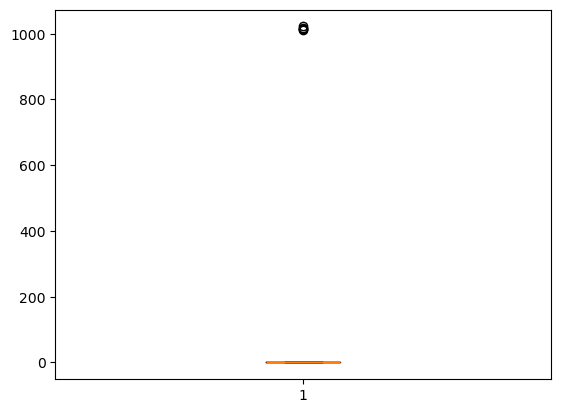

In [247]:
plt.boxplot(file['Atmospheric pressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x26b62fec9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x26b62fecee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26b62fec700>],
 'medians': [<matplotlib.lines.Line2D at 0x26b62ffc460>],
 'fliers': [<matplotlib.lines.Line2D at 0x26b62ffc6a0>],
 'means': []}

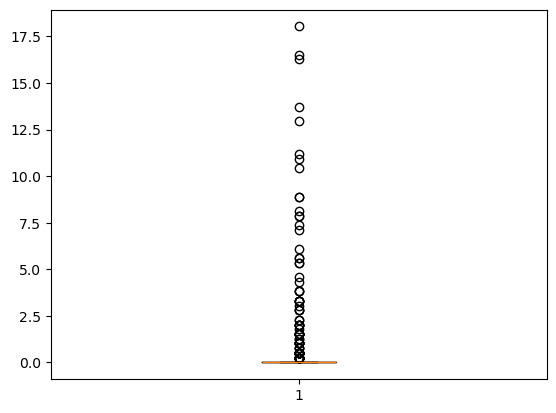

In [248]:
plt.boxplot(file['Total rainfall'])

#### Finding correlations

In [249]:
corr_ = file.corr()

In [250]:
import seaborn as sns

<Axes: >

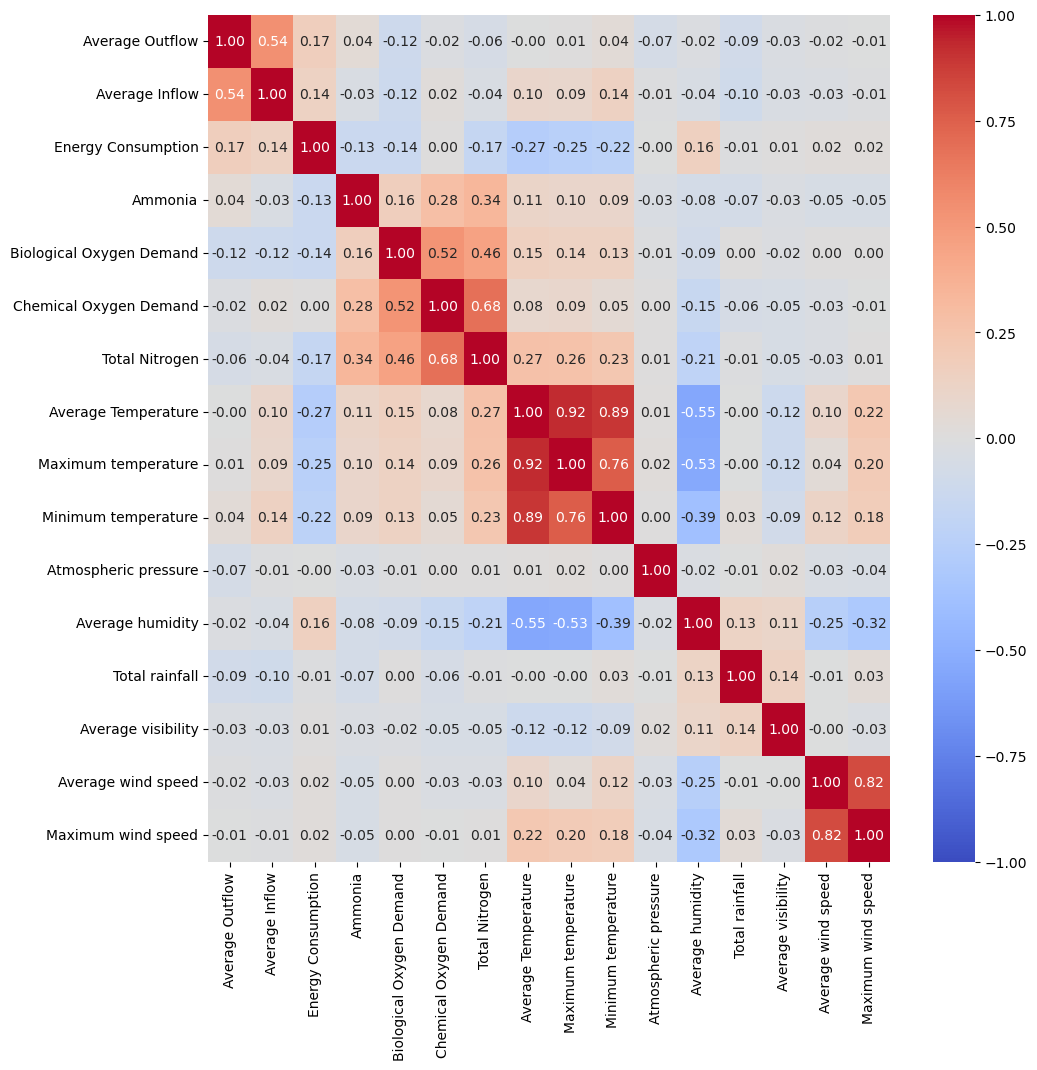

In [251]:
plt.figure(figsize=(11,11))
sns.heatmap(corr_,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)

#### Dropping columns which are not related to our analysis

In [252]:
file2 = file.drop(columns=['Average Temperature', 'Maximum temperature', 'Minimum temperature', 'Atmospheric pressure', 'Average humidity',
                            'Total rainfall', 'Average visibility', 'Average wind speed',
                            'Maximum wind speed' ])

In [253]:
file2

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590
...,...,...,...,...,...,...,...
1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807
1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671
1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000
1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479


In [254]:
file2.duplicated().sum()

0

In [255]:
def outlier_treatment(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    # lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR
    # print(upper_lim)
    return upper_lim

#### Creating our target column using Ammonia, BOD and COD columns <br>
1--> for Optimal performace</br>
2--> for suboptimal performance

In [256]:
# Define thresholds (example values; replace with actual limits)
ammonia_limit = outlier_treatment(file2,'Ammonia')
bod_limit = outlier_treatment(file2,'Biological Oxygen Demand')
cod_limit = outlier_treatment(file2,'Chemical Oxygen Demand')

# Create a binary target column
file2['Optimal_Operation'] = (
    (file2['Ammonia'] <= ammonia_limit) &
    (file2['Biological Oxygen Demand'] <= bod_limit) &
    (file2['Chemical Oxygen Demand'] <= cod_limit)
).astype(int)  # 1 for optimal, 0 for suboptimal

In [257]:
file2

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Optimal_Operation
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,1
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,1
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,1
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,1
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,1
...,...,...,...,...,...,...,...,...
1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,1
1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,1
1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,1
1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,1


In [258]:
file2['Optimal_Operation'].value_counts()

Optimal_Operation
1    1306
0      76
Name: count, dtype: int64

In [259]:
correl = file2.corr()

<Axes: >

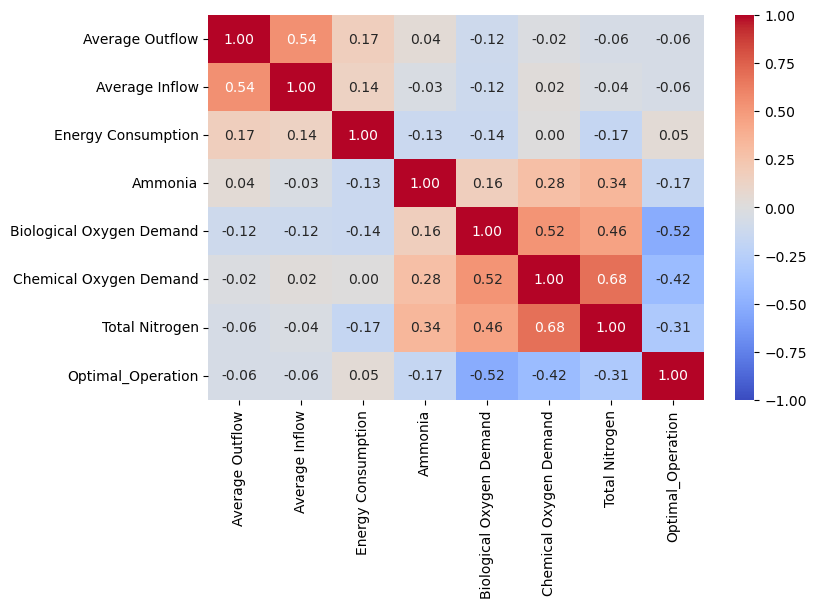

In [260]:
plt.figure(figsize=(8,5))
sns.heatmap(correl,annot=True,cmap='coolwarm',fmt='.2f',vmin=-1,vmax=1)

### 2.	Modeling with Machine Learning Algorithms:

In [261]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve

### Splitting data into train and test dataset

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['Average Inflow', 'Energy Consumption', 'Ammonia', 
            'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen']
X = file2[features]

# Optional: Select a target variable if required
target = 'Optimal_Operation'  # Replace with your actual target column name
y = file2[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes to verify
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Optional: Convert scaled data back to DataFrame for reference
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features)

# Print first few rows of the scaled training set
X_train_scaled_df.head()


X_train_scaled shape: (967, 6)
X_test_scaled shape: (415, 6)
y_train shape: (967,)
y_test shape: (415,)


,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen
0,-0.945020,0.687269,-0.002562,-0.369305,1.022929,0.179257
1,0.149081,-0.644597,1.414985,-0.369305,0.604374,0.937286
2,-0.218961,-0.557545,0.899514,1.671168,1.790281,1.732540
3,-0.894897,-0.255729,1.157250,-0.489333,-0.442014,-0.294512
4,0.147649,1.258840,-0.904637,-0.609361,0.325338,0.116933


####	Logistic Regression from scratch

In [263]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Number of samples and features
        m, n = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.num_iterations):
            # Linear function: z = X * weights + bias
            z = np.dot(X, self.weights) + self.bias
            
            # Apply sigmoid function to get predicted probabilities
            y_pred = self.sigmoid(z)
            
            # Compute gradients
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)
            
            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        # Linear function
        z = np.dot(X, self.weights) + self.bias
        # Apply sigmoid to get probabilities, then classify
        y_pred = self.sigmoid(z)
        return np.where(y_pred >= 0.5, 1, 0)


Performance Metrics for Logistic Regression from scratch model

In [264]:
# Create and train the Logistic Regression model
log_reg = LogisticRegressionScratch(learning_rate=0.01, num_iterations=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9542

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.42        26
           1       0.95      1.00      0.98       389

    accuracy                           0.95       415
   macro avg       0.98      0.63      0.70       415
weighted avg       0.96      0.95      0.94       415

Confusion Matrix:
 [[  7  19]
 [  0 389]]


####	Logistic Regression from sklearn

In [265]:
from sklearn.linear_model import LogisticRegression

In [266]:
# Logistic Regression Model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)

In [267]:
y_test.shape

(415,)

Performance Metrics for Logistic Regression from sklearn model

In [268]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)


Accuracy: 0.97
Confusion Matrix:
[[ 17   9]
 [  3 386]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.98      0.99      0.98       389

    accuracy                           0.97       415
   macro avg       0.91      0.82      0.86       415
weighted avg       0.97      0.97      0.97       415



#### 	K-Nearest Neighbours (KNN)

In [269]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_classifier.predict(X_test_scaled)

Performance Metrics for KNN model

In [270]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[ 16  10]
 [  0 389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        26
           1       0.97      1.00      0.99       389

    accuracy                           0.98       415
   macro avg       0.99      0.81      0.87       415
weighted avg       0.98      0.98      0.97       415



#### Decision Tree Classifier

In [271]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()

dtr.fit(X_train_scaled, y_train)

ypred = dtr.predict(X_test_scaled)

Performance Metrics for Decision Tree model

In [272]:
# Evaluate the Model
accuracy = accuracy_score(y_test, ypred)
conf_matrix = confusion_matrix(y_test, ypred)
report = classification_report(y_test, ypred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 1.00
Confusion Matrix:
[[ 26   0]
 [  0 389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       389

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



#### 	Random Forest Classifier

In [273]:
from sklearn.ensemble import RandomForestClassifier

rf_regressor =RandomForestClassifier()
rf_regressor.fit(X_train_scaled, y_train)

y_pred = rf_regressor.predict(X_test_scaled)

Performance Metrics for Random Forest model

In [274]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 1.00
Confusion Matrix:
[[ 25   1]
 [  0 389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       1.00      1.00      1.00       389

    accuracy                           1.00       415
   macro avg       1.00      0.98      0.99       415
weighted avg       1.00      1.00      1.00       415



#### 	Support Vector Machine (SVM)

In [275]:
from sklearn.svm import SVC

# Initialize the SVM classifier with RBF kernel
svm = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm.fit(X_train_scaled, y_train)

# Predict the labels of the test set
y_pred = svm.predict(X_test_scaled)

Performance Metrics for SVM model

In [276]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.99
Confusion Matrix:
[[ 24   2]
 [  1 388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.99      1.00      1.00       389

    accuracy                           0.99       415
   macro avg       0.98      0.96      0.97       415
weighted avg       0.99      0.99      0.99       415



## 3.	Model Evaluation:

In [277]:
from sklearn.model_selection import RandomizedSearchCV

### Hyperparameter Tuning for Logistic Regression 

In [278]:
# Define the parameter distribution
param_distributions = {
    'C': [0.01,0.1,1,10],  # Regularization strength (larger values mean less regularization)
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
    'penalty': ['l1', 'l2'],  # Regularization terms
    'max_iter': [100]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_distributions,
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 1}
Best Cross-Validation Score: 0.9741520217937076


In [279]:
# Use the best estimator for predictions
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.97
Confusion Matrix:
[[ 17   9]
 [  3 386]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74        26
           1       0.98      0.99      0.98       389

    accuracy                           0.97       415
   macro avg       0.91      0.82      0.86       415
weighted avg       0.97      0.97      0.97       415



### Hyperparameter Tuning for KNN

In [280]:
# Define the KNN model and parameter distributions
knn = KNeighborsClassifier()
param_distributions = {
    'n_neighbors': [4,5,9,12],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function
    'p': [1, 2]  # Distance metric: 1=Manhattan, 2=Euclidean
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to try
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 4}


c:\Users\harsh\anaconda3\envs\first_env\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [281]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.98
Confusion Matrix:
[[ 20   6]
 [  1 388]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.98      1.00      0.99       389

    accuracy                           0.98       415
   macro avg       0.97      0.88      0.92       415
weighted avg       0.98      0.98      0.98       415



### Hyperparameter Tuning for Decision Tree 

In [282]:
# Define the Decision Tree model and parameter distributions
dtree = DecisionTreeClassifier(random_state=42)
param_distributions = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'max_depth': [1,10,15,20],  # Maximum depth of the tree
    'min_samples_split': [2,5,10],  # Minimum samples to split a node
    'min_samples_leaf': [2,4,6],  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for split
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dtree,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to try
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Evaluate the best model
best_dtree = random_search.best_estimator_
y_pred = best_dtree.predict(X_test)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy'}


In [283]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 1.00
Confusion Matrix:
[[ 26   0]
 [  0 389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00       389

    accuracy                           1.00       415
   macro avg       1.00      1.00      1.00       415
weighted avg       1.00      1.00      1.00       415



### Hyperparameter Tuning for Random Forest

In [284]:
# Define the Random Forest model and parameter distributions
rf = RandomForestClassifier(random_state=42)
param_distributions = {
    'n_estimators': [100,200,300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [3,6,9],  # Minimum samples to split a node
    'min_samples_leaf': [4,5],  # Minimum samples in a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features considered for best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to sample
    scoring='accuracy',
    cv=5,  # Cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

random_search.fit(X_train, y_train)

# Evaluate the best model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [285]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.99
Confusion Matrix:
[[ 23   3]
 [  0 389]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.99      1.00      1.00       389

    accuracy                           0.99       415
   macro avg       1.00      0.94      0.97       415
weighted avg       0.99      0.99      0.99       415



In [286]:
from scipy.stats import loguniform

### Hyperparameter Tuning for Support Vector Machine (SVM)

In [287]:
# Define the SVM model and parameter distributions
svm = SVC(random_state=42)
param_distributions = {
    'C': loguniform(1e-3, 1e3),  # Regularization parameter
    'gamma': loguniform(1e-4, 1e1),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'degree': [2, 3, 4, 5],  # Degree for the 'poly' kernel
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings to try
    scoring='accuracy',
    cv=5,  # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

random_search.fit(X_train_scaled, y_train)

# Evaluate the best model
best_svm = random_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'C': 23.66154006460317, 'degree': 2, 'gamma': 0.10710256549997928, 'kernel': 'rbf'}


In [288]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.99
Confusion Matrix:
[[ 24   2]
 [  3 386]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.99      0.99      0.99       389

    accuracy                           0.99       415
   macro avg       0.94      0.96      0.95       415
weighted avg       0.99      0.99      0.99       415

